# Corona Virus Dataset Analysis


## Contents
### Data Cleaning
* Missing Values
* Handling Outliers
* Discretization

### Data Understanding and EDA
* World Wide Analysis
* Continent Wise Analysis
* Country Wise Analysis
* Analysing Iran 

In [211]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from plotly.subplots import make_subplots
import plotly as pt
from plotly import graph_objs as go
import plotly.express as px
import squarify
import plotly.graph_objects as pgo
import plotly.figure_factory as ff
warnings.filterwarnings('ignore')
sns.set(font_scale=1.3)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('owid-covid-data.csv')

In [3]:
data.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                 NaN           NaN         0.0                  NaN   
1                 NaN           NaN         0.0                  NaN   
2                 NaN           NaN         0.0                  NaN   
3                 NaN           NaN         0.0                  NaN   
4                 NaN           NaN         0.0                  NaN   

   total_cases_per_million  new_cases_per_million  \
0                      NaN                    0.0   
1                      NaN                    0.0   
2                      NaN                    0.0   
3                      NaN                    0.0   
4                      NaN                    0.0   

   new_cases_smoothed_per_million  total_deaths_per_million  \
0                             NaN                       NaN   
1                             NaN                       NaN   
2                             NaN                       NaN   
3                             NaN                       NaN   
4                             NaN                       NaN   

   new_deaths_per_million  new_deaths_smoothed_per_million  reproduction_rate  \
0                     0.0                              NaN                NaN   
1                     0.0                              NaN                NaN   
2                     0.0                              NaN                NaN   
3                     0.0                              NaN                NaN   
4                     0.0                              NaN                NaN   

   icu_patients  icu_patients_per_million  hosp_patients  \
0           NaN                       NaN            NaN   
1           NaN                       NaN            NaN   
2           NaN                       NaN            NaN   
3           NaN                       NaN            NaN   
4           NaN                       NaN            NaN   

   hosp_patients_per_million  weekly_icu_admissions  \
0                        NaN                    NaN   
1                        NaN                    NaN   
2                        NaN                    NaN   
3                        NaN                    NaN   
4                        NaN                    NaN   

   weekly_icu_admissions_per_million  weekly_hosp_admissions  \
0                                NaN                     NaN   
1                                NaN                     NaN   
2                                NaN                     NaN   
3                                NaN                     NaN   
4                                NaN                     NaN   

   weekly_hosp_admissions_per_million  total_tests  new_tests  \
0                                 NaN          NaN        NaN   
1                                 NaN          NaN        NaN   
2                                 NaN          NaN        NaN   
3                                 NaN          NaN        NaN   
4                                 NaN          NaN        NaN   

   total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                       NaN                     NaN                 NaN   
1                       NaN                     NaN                 NaN   
2                       NaN                     NaN                 NaN   
3                       NaN                     NaN                 NaN   
4                       NaN                     NaN                 NaN   

   new_tests_smoothed_per_

In [4]:
data.shape

(355174, 67)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355174 entries, 0 to 355173
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    355174 non-null  object 
 1   continent                                   338302 non-null  object 
 2   location                                    355174 non-null  object 
 3   date                                        355174 non-null  object 
 4   total_cases                                 317212 non-null  float64
 5   new_cases                                   345616 non-null  float64
 6   new_cases_smoothed                          344357 non-null  float64
 7   total_deaths                                295499 non-null  float64
 8   new_deaths                                  345664 non-null  float64
 9   new_deaths_smoothed                         344434 non-null  float64
 

Before everything, let's just remove columns we do not need for this task

In [6]:
unnecessary_cols = ['people_fully_vaccinated_per_hundred', 'new_tests_per_thousand', 'new_tests', 
                    'people_vaccinated_per_hundred', 'total_tests', 'total_tests_per_thousand', 
                    'total_vaccinations_per_hundred', 'tests_per_case', 'positive_rate', 'new_tests_smoothed',
                    'new_tests_smoothed_per_thousand', 'handwashing_facilities', 'extreme_poverty', 
                    'new_people_vaccinated_smoothed_per_hundred', 'new_vaccinations_smoothed_per_million',
                    'reproduction_rate', 'stringency_index', 'hospital_beds_per_thousand', 'human_development_index',
                    'aged_65_older', 'cardiovasc_death_rate', 'aged_70_older', 'total_deaths_per_million', 
                    'population_density', 'total_cases_per_million', 'life_expectancy', 'new_cases_smoothed_per_million', 
                    'new_deaths_smoothed_per_million', 'new_cases_per_million', 'new_deaths_per_million',
                    'iso_code', 'tests_units', 'people_vaccinated', 'new_vaccinations_smoothed', 'new_cases', 
                    'new_deaths']

In [7]:
len(unnecessary_cols)

36

In [8]:
data.drop(unnecessary_cols, axis=1, inplace=True)

In [9]:
data.shape

(355174, 31)

## Data Cleaning
### 1) Handling null values
* Removing columns with more than 80% null values
* Setting a constant for some features
* Imputing median for some numerical features

Firstly, we detect columns which have more than 80% null values

In [10]:
nulls = data.isna().sum()
all_n = (nulls[nulls != 0] / len(data) * 100).sort_values(ascending=False)
all_n[all_n >= 80]

weekly_icu_admissions                      97.112120
weekly_icu_admissions_per_million          97.112120
excess_mortality_cumulative_per_million    96.561967
excess_mortality                           96.561967
excess_mortality_cumulative                96.561967
excess_mortality_cumulative_absolute       96.561967
weekly_hosp_admissions                     93.420690
weekly_hosp_admissions_per_million         93.420690
icu_patients                               89.379009
icu_patients_per_million                   89.379009
hosp_patients                              89.003981
hosp_patients_per_million                  89.003981
total_boosters                             86.513652
total_boosters_per_hundred                 86.513652
new_vaccinations                           81.511597
dtype: float64

We want to remove these columns

In [11]:
null_cols = nulls[nulls / len(data) * 100 >= 80].index
null_cols

Index(['icu_patients', 'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_boosters',
       'new_vaccinations', 'total_boosters_per_hundred',
       'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
       'excess_mortality', 'excess_mortality_cumulative_per_million'],
      dtype='object')

In [12]:
len(null_cols)

15

In [13]:
data.drop(null_cols, axis=1, inplace=True)

In [14]:
data.shape

(355174, 16)

For the rest of it we have

In [15]:
(data.isna().sum() / len(data) * 100).sort_values(ascending=False)

people_fully_vaccinated           79.466402
total_vaccinations                77.569304
new_people_vaccinated_smoothed    48.663472
male_smokers                      42.598839
female_smokers                    41.807114
gdp_per_capita                    22.609200
median_age                        21.041799
diabetes_prevalence               18.478549
total_deaths                      16.801624
total_cases                       10.688282
continent                          4.750348
new_cases_smoothed                 3.045550
new_deaths_smoothed                3.023870
location                           0.000000
date                               0.000000
population                         0.000000
dtype: float64

For 'date' columns we convert it to datetime.

In [16]:
data['date'] = pd.to_datetime(data['date'])

Null continent means it is unknown

In [17]:
data['continent'].fillna('Unknown', inplace=True)

Imputing Null values with median

In [18]:
for col in data.select_dtypes(include=['number']).columns:
    data[col] = data[col].fillna(data[col].median())

In [19]:
data.isna().sum().sum()

0

Extracting numerical features and categorical features

In [20]:
num_df = data.select_dtypes(include=['number'])
num_cols = num_df.columns
len(num_cols)

13

In [21]:
cat_df = data.select_dtypes(include=['object'])
cat_cols = cat_df.columns
cat_cols

Index(['continent', 'location'], dtype='object')

### 2) Handling outliers
* IQR
* Winsorization

In [22]:
def IQR(column):
    Q1 = np.quantile(column, 0.25)
    Q3 = np.quantile(column, 0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    out = (column < lower_bound) | (column > upper_bound)
    return column[~out]

In [23]:
def winsorization(column):
    lower_bound = 5
    upper_bound = 95
    data_clipped = column.clip(lower=np.percentile(column, lower_bound), upper=np.percentile(column, upper_bound))
    return data_clipped

Tests

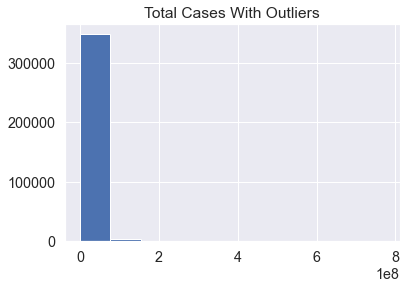

In [24]:
data['total_cases'].hist()
plt.title('Total Cases With Outliers')
plt.show()

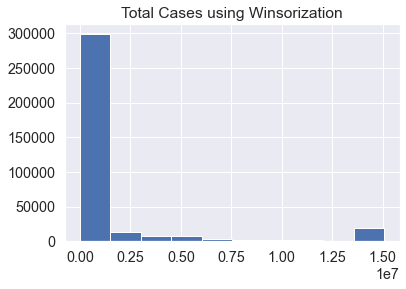

In [25]:
winsorization(data['total_cases']).hist()
plt.title('Total Cases using Winsorization')
plt.show()

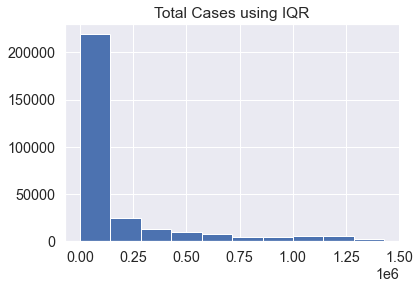

In [26]:
IQR(data['total_cases']).hist()
plt.title('Total Cases using IQR')
plt.show()

IQR method 

In [27]:
clean_data = data.copy()

In [28]:
def IQR_df(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    out = (df < lower_bound) | (df > upper_bound)
    return out

In [29]:
out = IQR_df(clean_data.drop('date', axis=1))
clean_data = clean_data[~out.any(axis=1)]

In [30]:
clean_data.shape

(85267, 16)

Loss

In [31]:
print('Information Loss:', (1 - len(clean_data) / len(data)) * 100, '%')

Information Loss: 75.99289362397023 %


In [32]:
data.head()

continent     location       date  total_cases  new_cases_smoothed  \
0      Asia  Afghanistan 2020-01-03      71363.0              23.571   
1      Asia  Afghanistan 2020-01-04      71363.0              23.571   
2      Asia  Afghanistan 2020-01-05      71363.0              23.571   
3      Asia  Afghanistan 2020-01-06      71363.0              23.571   
4      Asia  Afghanistan 2020-01-07      71363.0              23.571   

   total_deaths  new_deaths_smoothed  total_vaccinations  \
0        1341.0                0.143          11989694.0   
1        1341.0                0.143          11989694.0   
2        1341.0                0.143          11989694.0   
3        1341.0                0.143          11989694.0   
4        1341.0                0.143          11989694.0   

   people_fully_vaccinated  new_people_vaccinated_smoothed  median_age  \
0                5679226.0                           959.0        18.6   
1                5679226.0                           959.0        18.6   
2                5679226.0                           959.0        18.6   
3                5679226.0                           959.0        18.6   
4                5679226.0                           959.0        18.6   

   gdp_per_capita  diabetes_prevalence  female_smokers  male_smokers  \
0        1803.987                 9.59             6.3          33.1   
1        1803.987                 9.59             6.3          33.1   
2        1803.987                 9.59             6.3          33.1   
3        1803.987                 9.59             6.3          33.1   
4        1803.987                 9.59             6.3          33.1   

   population  
0  41128772.0  
1  41128772.0  
2  41128772.0  
3  41128772.0  
4  41128772.0

In [33]:
data.shape

(355174, 16)

### Discretization
Before anything, let's descrete **median_age** feature

In [34]:
data['median_age'].min()

15.1

In [35]:
data['median_age'].max()

48.2

In [36]:
def encode_age(age):
    if 10 <= age < 20:
        return '10 to 20'
    elif 20 <= age < 30:
        return '20 to 30'
    elif 30 <= age < 40:
        return '30 to 40'
    elif 40 <= age < 50:
        return '40 to 50'

In [37]:
data['median_age'] = data['median_age'].apply(encode_age)

In [38]:
num_df = data.select_dtypes(include=['number'])
num_cols = num_df.columns

In [39]:
cat_df = data.select_dtypes(include=['object'])
cat_cols = cat_df.columns

---
## Data Understanding and EDA
### Univariate analysis
* Numerical features
* Categorical features


Analyzing numerical features

In [40]:
def hists(start, end):
    data[num_cols[start:end]].hist(figsize=(12, 8), layout=(2, 3))
    plt.show()

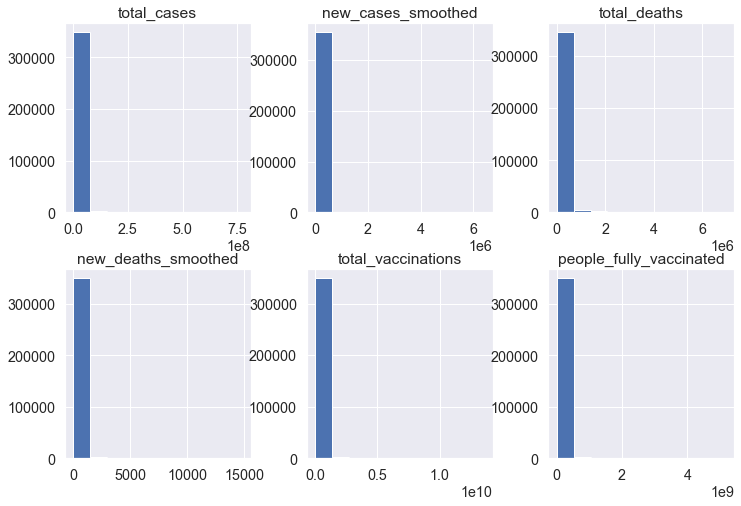

In [41]:
hists(0, 6)

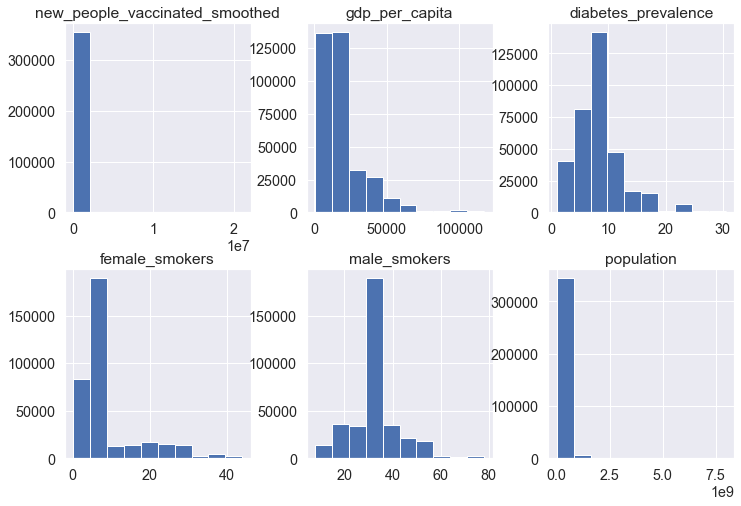

In [42]:
hists(6, 12)

Analyzing categorical features

In [43]:
cat_cols

Index(['continent', 'location', 'median_age'], dtype='object')

In [44]:
cat_df.nunique()

continent       7
location      255
median_age      4
dtype: int64

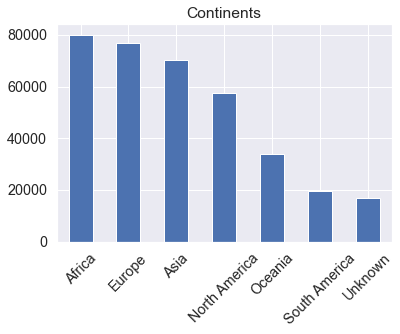

In [45]:
cat_df['continent'].value_counts().plot(kind='bar')
plt.title('Continents')
plt.xticks(rotation=45)
plt.show()

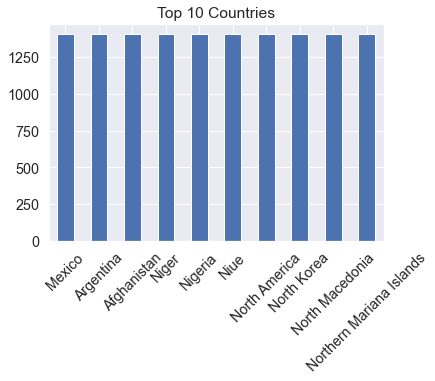

In [46]:
cat_df['location'].value_counts()[:10].plot(kind='bar')
plt.title('Top 10 Countries')
plt.xticks(rotation=45)
plt.show()

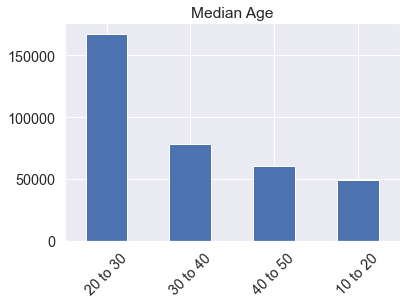

In [47]:
cat_df['median_age'].value_counts().plot(kind='bar')
plt.title('Median Age')
plt.xticks(rotation=45)
plt.show()

### Bivariate Analysis
* World Wide Analysis
* Continent Wise Analysis
* Country Wise Analysis
* Analysing Iran 

In [48]:
data.head()

continent     location       date  total_cases  new_cases_smoothed  \
0      Asia  Afghanistan 2020-01-03      71363.0              23.571   
1      Asia  Afghanistan 2020-01-04      71363.0              23.571   
2      Asia  Afghanistan 2020-01-05      71363.0              23.571   
3      Asia  Afghanistan 2020-01-06      71363.0              23.571   
4      Asia  Afghanistan 2020-01-07      71363.0              23.571   

   total_deaths  new_deaths_smoothed  total_vaccinations  \
0        1341.0                0.143          11989694.0   
1        1341.0                0.143          11989694.0   
2        1341.0                0.143          11989694.0   
3        1341.0                0.143          11989694.0   
4        1341.0                0.143          11989694.0   

   people_fully_vaccinated  new_people_vaccinated_smoothed median_age  \
0                5679226.0                           959.0   10 to 20   
1                5679226.0                           959.0   10 to 20   
2                5679226.0                           959.0   10 to 20   
3                5679226.0                           959.0   10 to 20   
4                5679226.0                           959.0   10 to 20   

   gdp_per_capita  diabetes_prevalence  female_smokers  male_smokers  \
0        1803.987                 9.59             6.3          33.1   
1        1803.987                 9.59             6.3          33.1   
2        1803.987                 9.59             6.3          33.1   
3        1803.987                 9.59             6.3          33.1   
4        1803.987                 9.59             6.3          33.1   

   population  
0  41128772.0  
1  41128772.0  
2  41128772.0  
3  41128772.0  
4  41128772.0

### World Wide Analysis

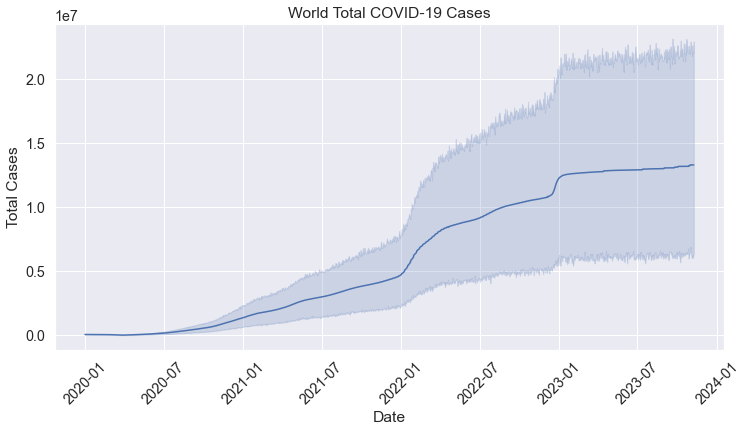

In [49]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='total_cases', data=data)
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('World Total COVID-19 Cases')
plt.xticks(rotation=45)
plt.show()

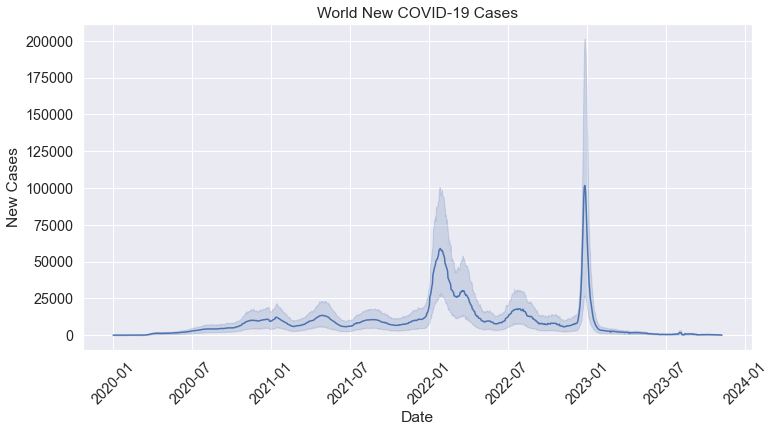

In [92]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='new_cases_smoothed', data=data)
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('World New COVID-19 Cases')
plt.xticks(rotation=45)
plt.show()

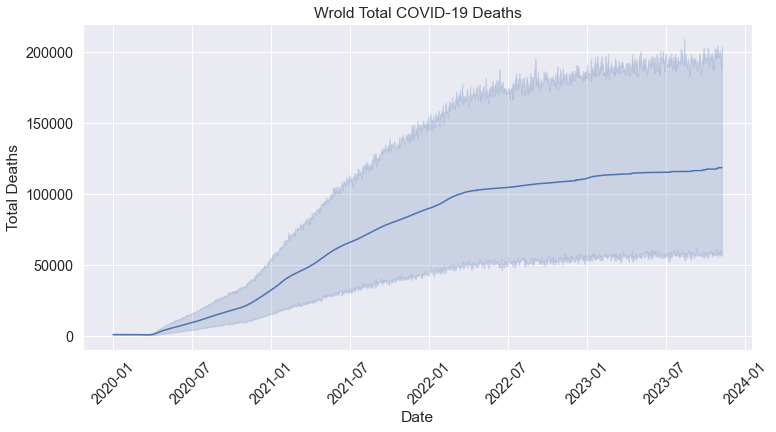

In [93]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='total_deaths', data=data)
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.title('Wrold Total COVID-19 Deaths')
plt.xticks(rotation=45)
plt.show()

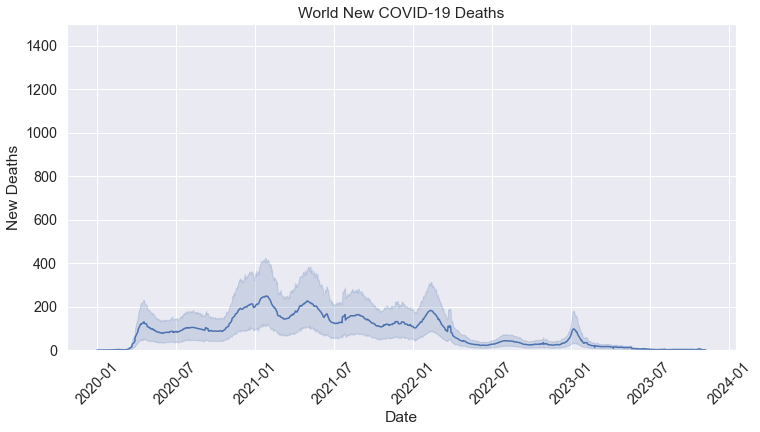

In [94]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='new_deaths_smoothed', data=data)
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.title('World New COVID-19 Deaths')
plt.xticks(rotation=45)
plt.ylim([0, 1500])
plt.show()

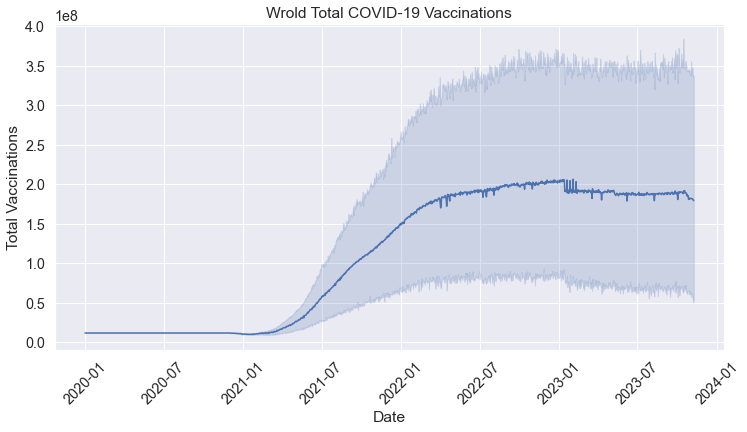

In [95]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='total_vaccinations', data=data)
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.title('Wrold Total COVID-19 Vaccinations')
plt.xticks(rotation=45)
plt.show()

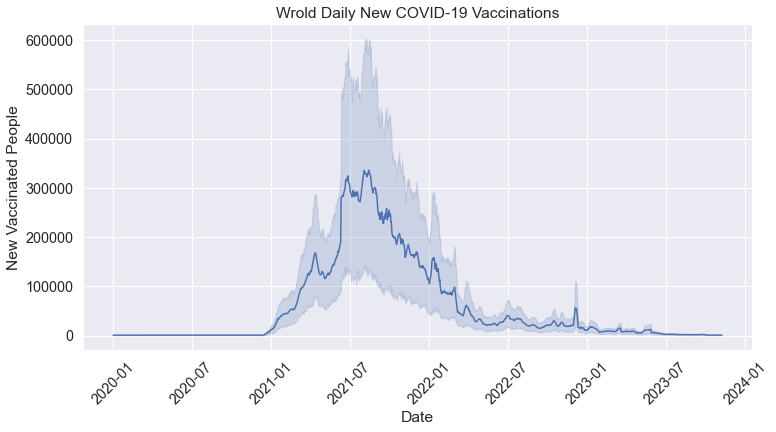

In [96]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='new_people_vaccinated_smoothed', data=data)
plt.xlabel('Date')
plt.ylabel('New Vaccinated People')
plt.title('Wrold Daily New COVID-19 Vaccinations')
plt.xticks(rotation=45)
plt.show()

### Continent Wise Analysis

In [66]:
data['continent'].unique()

array(['Asia', 'Unknown', 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

In [67]:
continents = ['Asia', 'Europe', 'North America', 'South America', 'Africa', 'Oceania']

Population percentage

In [90]:
continents_population = [list(data[data['location'] == i]['population'])[0] for i in continents]
total_population = list(data[data['location'] == 'World']['population'])[0]
continents_population_percentage = [round(i * 100 / total_population, 2) for i in continents_population]

COVID cases

In [91]:
continents_covid_cases = [list(data[data['location'] == i]['total_cases'])[-1] for i in continents]
total_covid_cases = list(data[data['location'] == 'World']['total_cases'])[-1]
continents_covid_case_percentage = [round(i * 100 / total_covid_cases, 2) for i in continents_covid_cases]

Infected percentage of population

In [92]:
infected_percentage = [round(continents_covid_cases[i] * 100 / continents_population[i], 2) for i in range(6)]

People fully vaccinated

In [94]:
continents_fully_vaccinated = [list(data[data['location'] == i]['people_fully_vaccinated'])[-2] for i in continents]
continents_fully_vaccinated_percentage = [round(continents_fully_vaccinated[i] * 100 / continents_population[i], 2)
                                          for i in range(6)]

Total deaths

In [95]:
continents_deaths = [list(data[data['location'] == i]['total_deaths'])[-1] for i in continents]
continents_deaths_percentage = [round(continents_deaths[i] * 100 / continents_population[i], 2) for i in range(6)]

In [96]:
continent_df = pd.DataFrame({'Continent': continents,
                             'Population_Percentage': continents_population_percentage,
                             'Covid_Case_Percentage': continents_covid_case_percentage,
                             'Infected_Percentage': infected_percentage,
                             'Full Vaccination Percentage': continents_fully_vaccinated_percentage,
                             'Total Death Percentage': continents_deaths_percentage})

In [97]:
continent_df

Continent  Population_Percentage  Covid_Case_Percentage  \
0           Asia                  59.20                  38.96   
1         Europe                   9.34                  32.41   
2  North America                   7.53                  16.13   
3  South America                   5.48                   8.92   
4         Africa                  17.89                   1.70   
5        Oceania                   0.56                   1.88   

   Infected_Percentage  Full Vaccination Percentage  Total Death Percentage  
0                 6.37                        73.31                    0.03  
1                33.58                        66.21                    0.28  
2                20.74                         0.95                    0.27  
3                15.76                        77.13                    0.31  
4                 0.92                         0.40                    0.02  
5                32.25                        12.61                    0.07

Visualization

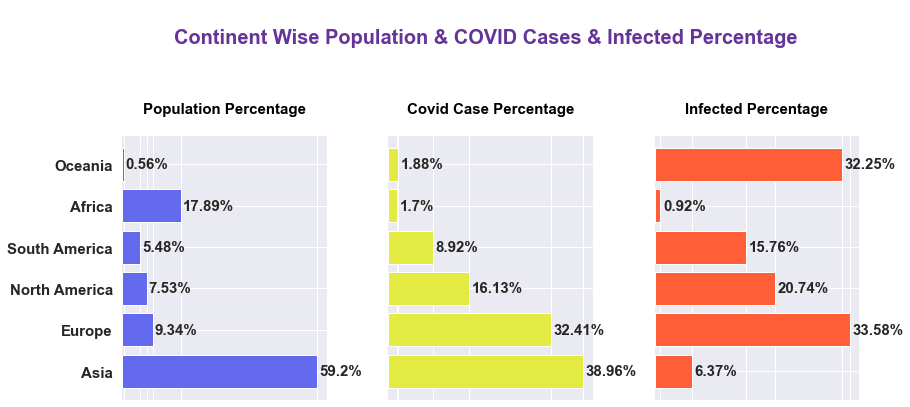

In [107]:
fig = plt.figure(figsize=(16, 6))
colors = ['#646aed', '#e3eb42', '#ff5e36']
cols = continent_df.drop(['Continent', 'Total Death Percentage', 'Full Vaccination Percentage'], axis=1).columns
j = 0
for i in cols:
    ax = fig.add_subplot(1, 4, j + 1)
    ax.barh(continent_df['Continent'], continent_df[i], color=colors[j])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    plt.xticks(continent_df[i], '')
    plt.yticks(fontsize=15, weight='bold')
    ax.set_title(' '.join(i.split('_')) + '\n', fontsize=15, color='black', weight='bold')
    for idx, value in continent_df[i].iteritems():
        ax.text(value + 0.5, idx, str(value) + '%', va='center', fontsize=15, weight='bold')
    if j > 0:
        ax.tick_params(labelleft=False)
    for pos, spine in ax.spines.items():
        spine.set_visible(False)
    j +=1

plt.suptitle('\nContinent Wise Population & COVID Cases & Infected Percentage', 
             fontsize=20, y=1, x=0.43, color='RebeccaPurple', weight='bold')
fig.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

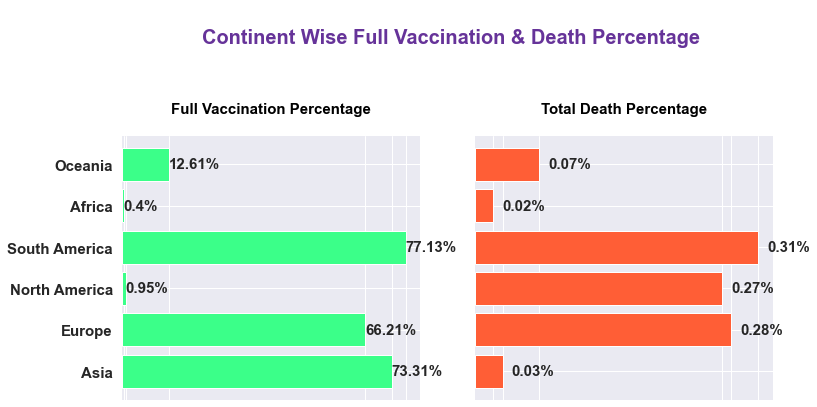

In [108]:
fig = plt.figure(figsize=(16, 6))
colors = ['#3bff89', '#ff5e36']
cols = continent_df.drop(['Continent', 'Population_Percentage',
                          'Covid_Case_Percentage', 'Infected_Percentage'], axis=1).columns
j = 0
for i in cols:
    ax = fig.add_subplot(1, 3, j + 1)
    ax.barh(continent_df['Continent'], continent_df[i], color=colors[j])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    plt.xticks(continent_df[i], '')
    plt.yticks(fontsize=15, weight='bold')
    ax.set_title(i + '\n', fontsize=15, color='black', weight='bold')
    for idx, value in continent_df[i].iteritems():
        ax.text(value + 0.01, idx, str(value) + '%', va='center', fontsize=15, weight='bold')
    if j > 0:
        ax.tick_params(labelleft=False)
    for pos, spine in ax.spines.items():
        spine.set_visible(False)
    j += 1

plt.suptitle('\nContinent Wise Full Vaccination & Death Percentage', fontsize=20, y=1, x=0.4,
             color='RebeccaPurple', weight='bold')
fig.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

Further analysis

In [251]:
def continent_eda(target):
    colors = ['#4938ff', '#45ffab', '#ff8a65', '#ff2441', '#af4dff', '#ffc524']
    line_size = [3, 2, 2, 2, 2, 2.5]
    mode_size = [12, 8, 8, 8, 8, 8]
    fig = go.Figure()
    for i in range(6):
        fig.add_trace(go.Scatter(x=data[data['location'] == continents[i]]['date'],
                                 y=data[data['location'] == continents[i]][target], mode='lines', name=continents[i],
                                 line=dict(color=colors[i], width=line_size[i]), connectgaps=True, opacity=0.6))

        fig.add_trace(go.Scatter(
            x=[list(data[data['location'] == continents[i]]['date'])[0],
               list(data[data['location'] == continents[i]]['date'])[-1]],
            y=[list(data[data['location'] == continents[i]][target])[0],
               list(data[data['location'] == continents[i]][target])[-1]],
            mode='markers', marker=dict(color=colors[i], size=mode_size[i])))

    fig.update_layout(
        xaxis=dict(
            showline=True, showgrid=False, showticklabels=True,
            linecolor='rgb(204, 204, 204)', linewidth=2, ticks='outside',
            tickfont=dict(size=12, color='rgb(82, 82, 82)',),),
        yaxis=dict(
            title=target.title().replace('_', ' '), showline=False, showgrid=True, showticklabels=True,
            ticks='outside', gridcolor='#f0f0f0', gridwidth=1,
            titlefont=dict(size=18, color='grey'),
            tickfont=dict(size=12, color='rgb(82, 82, 82)',),),
        showlegend=True,
        plot_bgcolor='white')

    annotations = []
    temp_continents = ['Asia', 'Europe', 'North America', 'South America', 'Africa', 'Oceania']
    count = 0
    for continent, color in zip(temp_continents, colors):
        annotations.append(dict(xref='paper', x=0.95, y=list(data[data['location'] == continent][target])[-1],
                                xanchor='left', yanchor='middle',
                                text='<b>{}</b>'.format(continent),
                                font=dict(size=12, color=colors[count]), showarrow=False))
        count += 1
    annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                                  xanchor='left', yanchor='bottom',
                                  text='Continent Wise COVID-19 ' + target.title().replace('_', ' '),
                                  font=dict(size=25),
                                  showarrow=False))

    fig.update_layout(font=dict(size=15, color='black'), annotations=annotations,
                      legend=dict(x=0, y=-0.2, traceorder='normal', orientation='h'))
    fig.show()

In [252]:
continent_eda('total_cases')

In [253]:
continent_eda('total_deaths')

### Country Wise Analysis

Firstly, we analyze these 10 countries

In [266]:
top_ten_countries = ['India', 'United States', 'Brazil', 'Russia', 'Germany', 'Iran',
                     'United Kingdom', 'France', 'Italy', 'Spain']

Population

In [267]:
countries_population = [list(data[data['location'] == i]['population'])[0] for i in top_ten_countries]
countries_population_percentage = [round(i * 100 / total_population, 2) for i in countries_population]

Total cases

In [268]:
countries_covid_cases = [list(data[data['location'] == i]['total_cases'])[-1] for i in top_ten_countries]
countries_covid_case_percentage = [round(i * 100 / total_covid_cases, 2) for i in countries_covid_cases]

Infected

In [269]:
countries_infected_percentage = [round(countries_covid_cases[i] * 100 / countries_population[i], 2) for i in range(10)]

Vaccination

In [270]:
countries_fully_vaccinated = [max([i for i in list(data[data['location'] == i]['people_fully_vaccinated'])])
                              for i in top_ten_countries]
countries_fully_vaccinated_percentage = [round(countries_fully_vaccinated[i] * 100 / countries_population[i], 2)
                                         for i in range(10)]

Total deaths

In [271]:
countries_deaths = [list(data[data['location'] == i]['total_deaths'])[-1] for i in top_ten_countries]
countries_deaths_percentage = [round(countries_deaths[i] * 100 / countries_population[i], 2) for i in range(10)]

In [272]:
country_df = pd.DataFrame({'Countries': top_ten_countries,
                           'Population_Percentage': countries_population_percentage,
                           'Covid_Case_Percentage': countries_covid_case_percentage,
                           'Infected_Percentage': countries_infected_percentage,
                           'Full Vaccination Percentage': countries_fully_vaccinated_percentage,
                           'Total Death Percentage': countries_deaths_percentage})

In [273]:
country_df

Countries  Population_Percentage  Covid_Case_Percentage  \
0           India                  17.77                   5.83   
1   United States                   4.24                  13.40   
2          Brazil                   2.70                   4.89   
3          Russia                   1.81                   3.00   
4         Germany                   1.05                   4.98   
5            Iran                   1.11                   0.99   
6  United Kingdom                   0.85                   3.21   
7          France                   0.85                   5.05   
8           Italy                   0.74                   3.40   
9           Spain                   0.60                   1.81   

   Infected_Percentage  Full Vaccination Percentage  Total Death Percentage  
0                 3.18                        67.18                    0.04  
1                30.58                        68.18                    0.34  
2                17.52                        81.82                    0.33  
3                15.98                        55.08                    0.28  
4                46.11                        76.24                    0.21  
5                 8.61                        66.16                    0.17  
6                36.74                        75.19                    0.34  
7                57.51                        78.44                    0.25  
8                44.48                        81.22                    0.33  
9                29.40                        85.66                    0.26

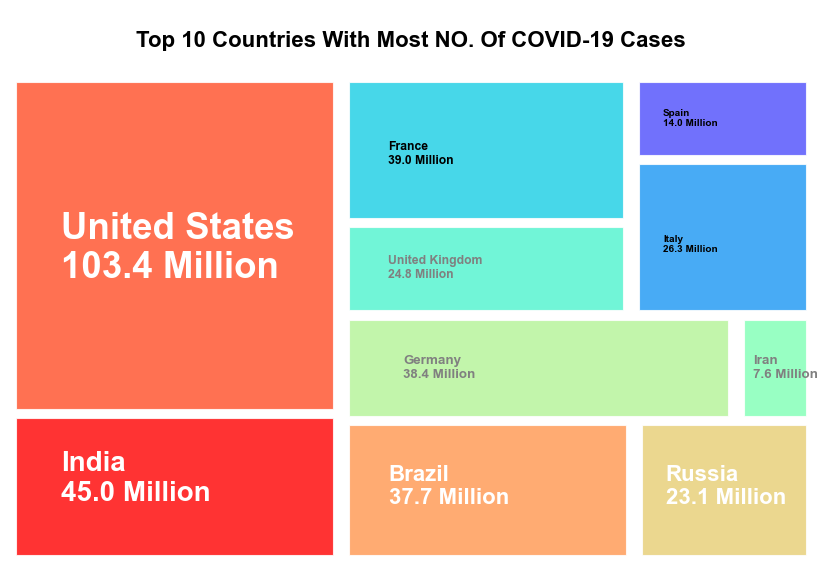

In [274]:
countries_cases_in_million = [round(i, 1) for i in np.array(countries_covid_cases) / 10**6]
colors = [plt.cm.rainbow_r(i / float(len(top_ten_countries))) for i in range(10)]
fig = plt.figure(figsize=(13, 8), dpi= 80)
ax = squarify.plot(sizes=countries_covid_cases, color=colors, alpha=.8, pad=True)
fontsizes = [25, 33, 20, 20, 12, 12, 11, 11, 9, 9]
font_colors = ['white', 'white', 'white', 'white', 'grey', 'grey', 'grey', 'black', 'black', 'black']
count = 0
for i, j in zip(ax.patches, countries_cases_in_million):
    middle = i.get_x() + (i.get_width() / 7), i.get_y() + (i.get_height() / 2.5)
    ax.text(middle[0], middle[1], top_ten_countries[count] + '\n' + str(j) + ' Million', 
            fontsize=fontsizes[count], weight='bold', color=font_colors[count])
    count += 1
    
plt.axis('off')
plt.title('\nTop 10 Countries With Most NO. Of COVID-19 Cases\n', fontsize=20, color='black', weight='bold')
plt.show()

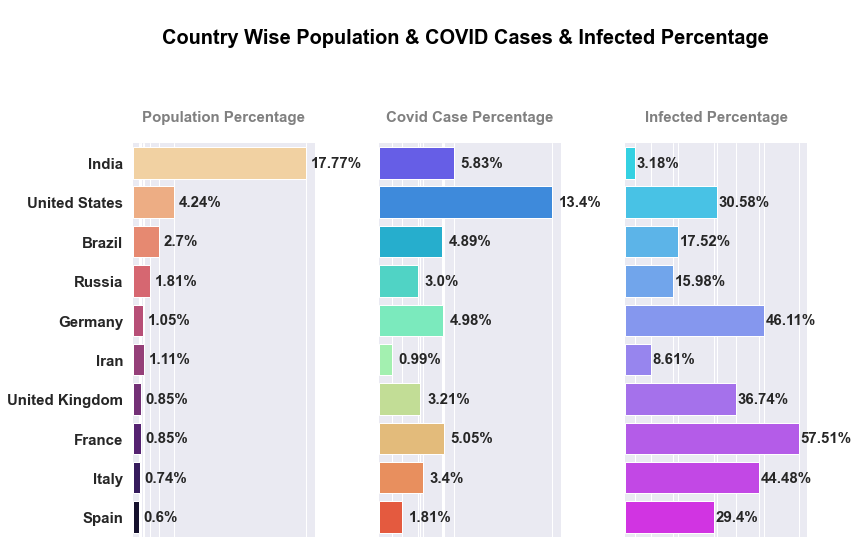

In [217]:
country_categories_one = country_df.columns.tolist()[1:4]
fig = plt.figure(figsize=(15, 8))
colors = ['magma_r', 'rainbow', 'cool']
for i in range(len(country_categories_one)):
    ax = fig.add_subplot(1, 4, i + 1)
    sns.barplot(y=country_df['Countries'], x=country_df[country_categories_one[i]], palette=colors[i])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    plt.xticks(country_df[country_categories_one[i]], '')
    plt.yticks(fontsize=15, weight='bold')
    plt.xlabel('')
    plt.ylabel('')
    ax.set_title(' '.join(country_categories_one[i].split('_')) + '\n', fontsize=15, color='grey', weight='bold')
    for idx, value in country_df[country_categories_one[i]].iteritems():
        ax.text(value + 0.5, idx, str(value) + '%', va='center', fontsize=15, weight='bold')
    if i > 0:
        ax.tick_params(labelleft=False)
    for pos, spine in ax.spines.items():
        spine.set_visible(False)

plt.suptitle('\nCountry Wise Population & COVID Cases & Infected Percentage',
             fontsize=20, y=1, x=0.44, color='black', weight='bold')
fig.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

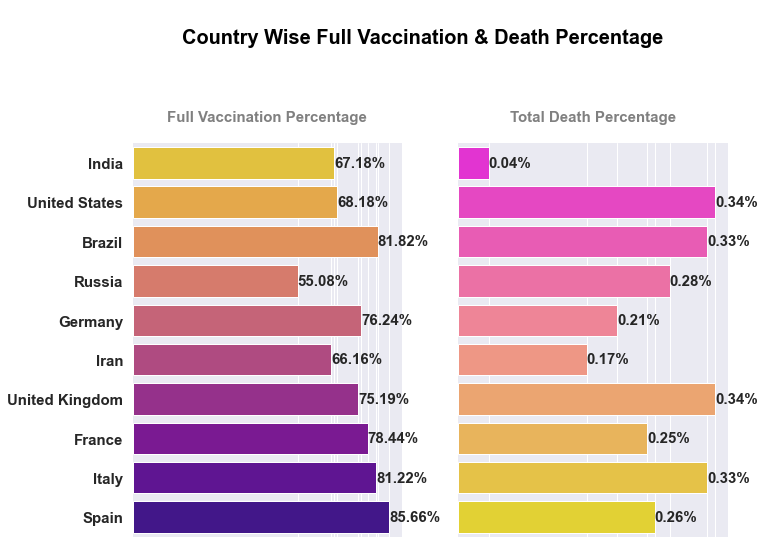

In [220]:
country_categories_two = country_df.columns.tolist()[4:]
fig = plt.figure(figsize=(15, 8))
colors = ['plasma_r', 'spring']
for i in range(len(country_categories_two)):
    ax = fig.add_subplot(1, 3, i + 1)
    sns.barplot(y=country_df['Countries'], x=country_df[country_categories_two[i]], palette=colors[i])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    plt.xticks(country_df[country_categories_two[i]], '')
    plt.yticks(fontsize=15, weight='bold')
    plt.xlabel('')
    plt.ylabel('')
    ax.set_title(' '.join(country_categories_two[i].split('_')) + '\n', fontsize=15, color='grey', weight='bold')
    for idx, value in country_df[country_categories_two[i]].iteritems():
        ax.text(value, idx, str(value) + '%', va='center', fontsize=15, weight='bold')
    if i > 0:
        ax.tick_params(labelleft=False)
    for pos, spine in ax.spines.items():
        spine.set_visible(False)

plt.suptitle('\nCountry Wise Full Vaccination & Death Percentage',
             fontsize=20, y=1, x=0.4, color='black', weight='bold')
fig.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

Further analysis

In [275]:
def country_eda(target):
    colors = ['#00bfff', '#00ffa6', '#2300b0', '#ffbf00', '#ff1745']
    line_size = [2, 3, 2, 2, 2]
    mode_size = [8, 12, 8, 8, 8]
    fig = go.Figure()
    for i in range(5):
        fig.add_trace(go.Scatter(x=data[data['location'] == top_ten_countries[i]]['date'],
                                 y=data[data['location'] == top_ten_countries[i]][target], 
                                 mode='lines', name=top_ten_countries[i],
                                 line=dict(color=colors[i], width=line_size[i]),
                                 connectgaps=True, opacity=0.6))
        fig.add_trace(go.Scatter(
            x=[list(data[data['location'] == top_ten_countries[i]]['date'])[0],
               list(data[data['location'] == top_ten_countries[i]]['date'])[-1]],
            y=[list(data[data['location'] == top_ten_countries[i]][target])[0],
               list(data[data['location'] == top_ten_countries[i]][target])[-1]],
            mode='markers', marker=dict(color=colors[i], size=mode_size[i]), name=top_ten_countries[i]))

    fig.update_layout(
        xaxis = dict(showline=True, showgrid=False, showticklabels=True,
                     linecolor='rgb(204, 204, 204)', linewidth=2,ticks='outside',
                     tickfont=dict(size=14, color='rgb(82, 82, 82)')),
        yaxis = dict(title=target.title().replace('_', ' '), showline=False, showgrid=True, showticklabels=True,
                     ticks='outside', gridcolor = '#f0f0f0', gridwidth=1,
                     titlefont=dict(size=18, color='grey'),
                     tickfont=dict(size=14, color='rgb(82, 82, 82)')),
        showlegend=True,
        plot_bgcolor='white')

    annotations = []
    temp_top_ten_countries = ['India', 'United States', 'Brazil', 'Russia', 'Germany', 'Iran',
                              'United Kingdom', 'France', 'Italy', 'Spain']
    count = 0
    for country, color in zip(temp_top_ten_countries[:5], colors):    
        annotations.append(dict(xref='paper', x=0.95, y=list(data[data['location'] == country][target])[-1],
                                xanchor='left', yanchor='middle',
                                text= '<b>{}</b>'.format(country),
                                font=dict(size=15, color=colors[count]),
                                showarrow=False))
        count += 1

    annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05, xanchor='left', yanchor='bottom',
                      text='COVID-19 ' + target.title().replace('_', ' '),
                      font=dict(size=25), showarrow=False))
    fig.update_layout(font=dict(size=15, color='black'), annotations=annotations,
                      legend=dict(x=0, y=-0.2, traceorder='normal', orientation='h'))
    fig.show()

In [276]:
country_eda('total_cases')

In [277]:
country_eda('total_deaths')

In [278]:
country_eda('new_people_vaccinated_smoothed')

### Analyzing Iran 
Here we choose Iran as a country of interest to analyze

In [279]:
iran = data[data['location'] == 'Iran']
iran.index = iran['date']
iran.drop('date', axis=1, inplace=True)

In [280]:
iran.head()

continent location  total_cases  new_cases_smoothed  total_deaths  \
date                                                                           
2020-01-03      Asia     Iran      71363.0              23.571        1341.0   
2020-01-04      Asia     Iran      71363.0              23.571        1341.0   
2020-01-05      Asia     Iran      71363.0              23.571        1341.0   
2020-01-06      Asia     Iran      71363.0              23.571        1341.0   
2020-01-07      Asia     Iran      71363.0              23.571        1341.0   

            new_deaths_smoothed  total_vaccinations  people_fully_vaccinated  \
date                                                                           
2020-01-03                0.143          11989694.0                5679226.0   
2020-01-04                0.143          11989694.0                5679226.0   
2020-01-05                0.143          11989694.0                5679226.0   
2020-01-06                0.143          11989694.0                5679226.0   
2020-01-07                0.143          11989694.0                5679226.0   

            new_people_vaccinated_smoothed median_age  gdp_per_capita  \
date                                                                    
2020-01-03                           959.0   30 to 40        19082.62   
2020-01-04                           959.0   30 to 40        19082.62   
2020-01-05                           959.0   30 to 40        19082.62   
2020-01-06                           959.0   30 to 40        19082.62   
2020-01-07                           959.0   30 to 40        19082.62   

            diabetes_prevalence  female_smokers  male_smokers  population  
date                                                                       
2020-01-03                 9.59             0.8          21.1  88550568.0  
2020-01-04                 9.59             0.8          21.1  88550568.0  
2020-01-05                 9.59             0.8          21.1  88550568.0  
2020-01-06                 9.59             0.8          21.1  88550568.0  
2020-01-07                 9.59             0.8          21.1  88550568.0

In [281]:
iran.shape

(1406, 15)

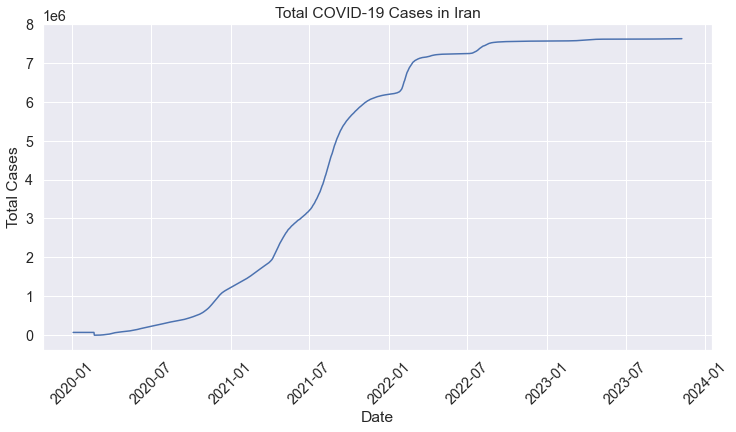

In [283]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='total_cases', data=iran)
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('Total COVID-19 Cases in Iran')
plt.xticks(rotation=45)
plt.show()

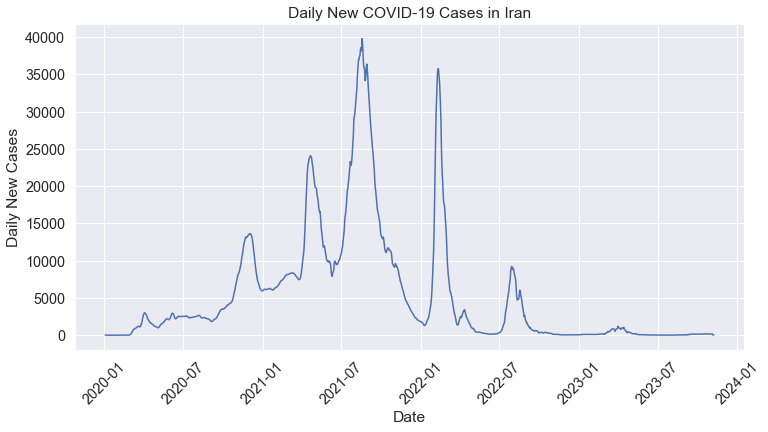

In [284]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='new_cases_smoothed', data=iran)
plt.xlabel('Date')
plt.ylabel('Daily New Cases')
plt.title('Daily New COVID-19 Cases in Iran')
plt.xticks(rotation=45)
plt.show()

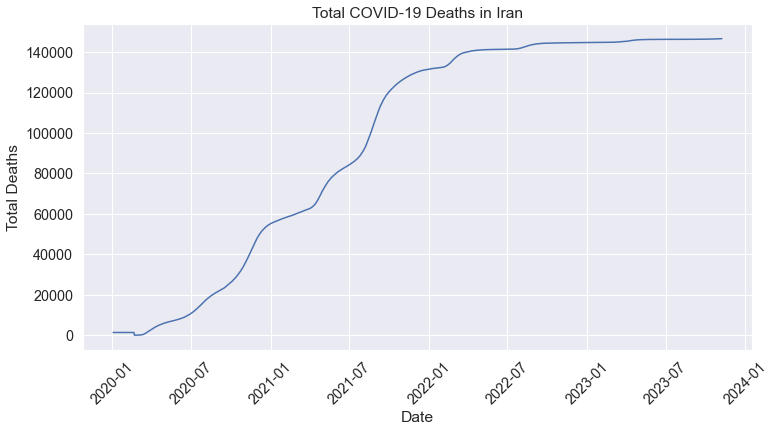

In [286]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='total_deaths', data=iran)
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.title('Total COVID-19 Deaths in Iran')
plt.xticks(rotation=45)
plt.show()

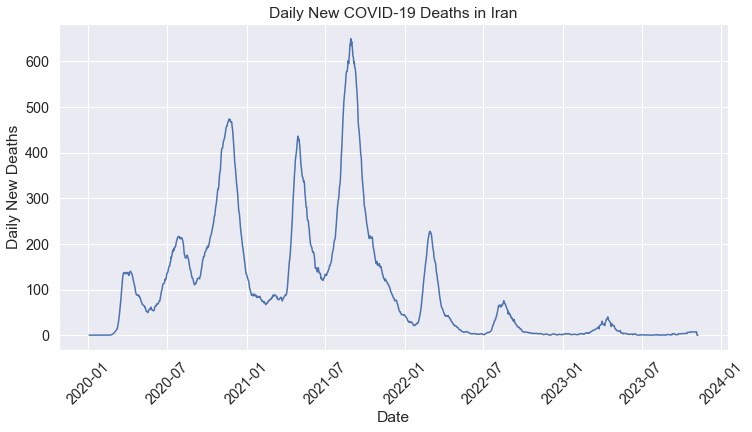

In [287]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='new_deaths_smoothed', data=iran)
plt.xlabel('Date')
plt.ylabel('Daily New Deaths')
plt.title('Daily New COVID-19 Deaths in Iran')
plt.xticks(rotation=45)
plt.show()

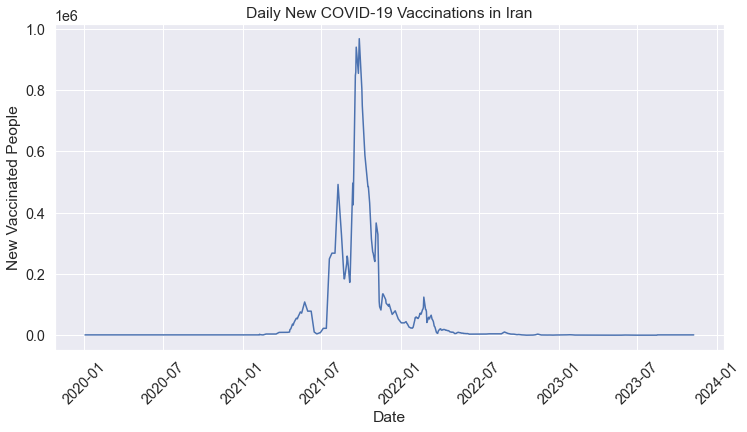

In [290]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='new_people_vaccinated_smoothed', data=iran)
plt.xlabel('Date')
plt.ylabel('New Vaccinated People')
plt.title('Daily New COVID-19 Vaccinations in Iran')
plt.xticks(rotation=45)
plt.show()